### Apply ML algorithms to Air Quality Index Problem

- Linear Regression

- Lasso Regression

- Decision Tree Regressor

- KNN Regressor

- RandomForestRegressor

- Xgboost Regressor

- Hyperparameter Tuning



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\ml_projects\AQI\Real_Combine.csv')

In [7]:
df

T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
0      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4  219.720833
1      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1  182.187500
2      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1  154.037500
3      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6  223.208333
4     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2  200.645833
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[1093 rows x 9 columns]

In [8]:
df.shape

(1093, 9)

In [9]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [10]:
# check for null values

df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [11]:
# since there is only null value , we can drop the null value

df = df.dropna()

In [12]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [13]:
# seperate data into independent and dependent features

x = df.iloc[:,:-1] ## independent features
y = df.iloc[:,-1]  ## dependent feayures

In [14]:
x.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [15]:
y.isnull().sum()

0

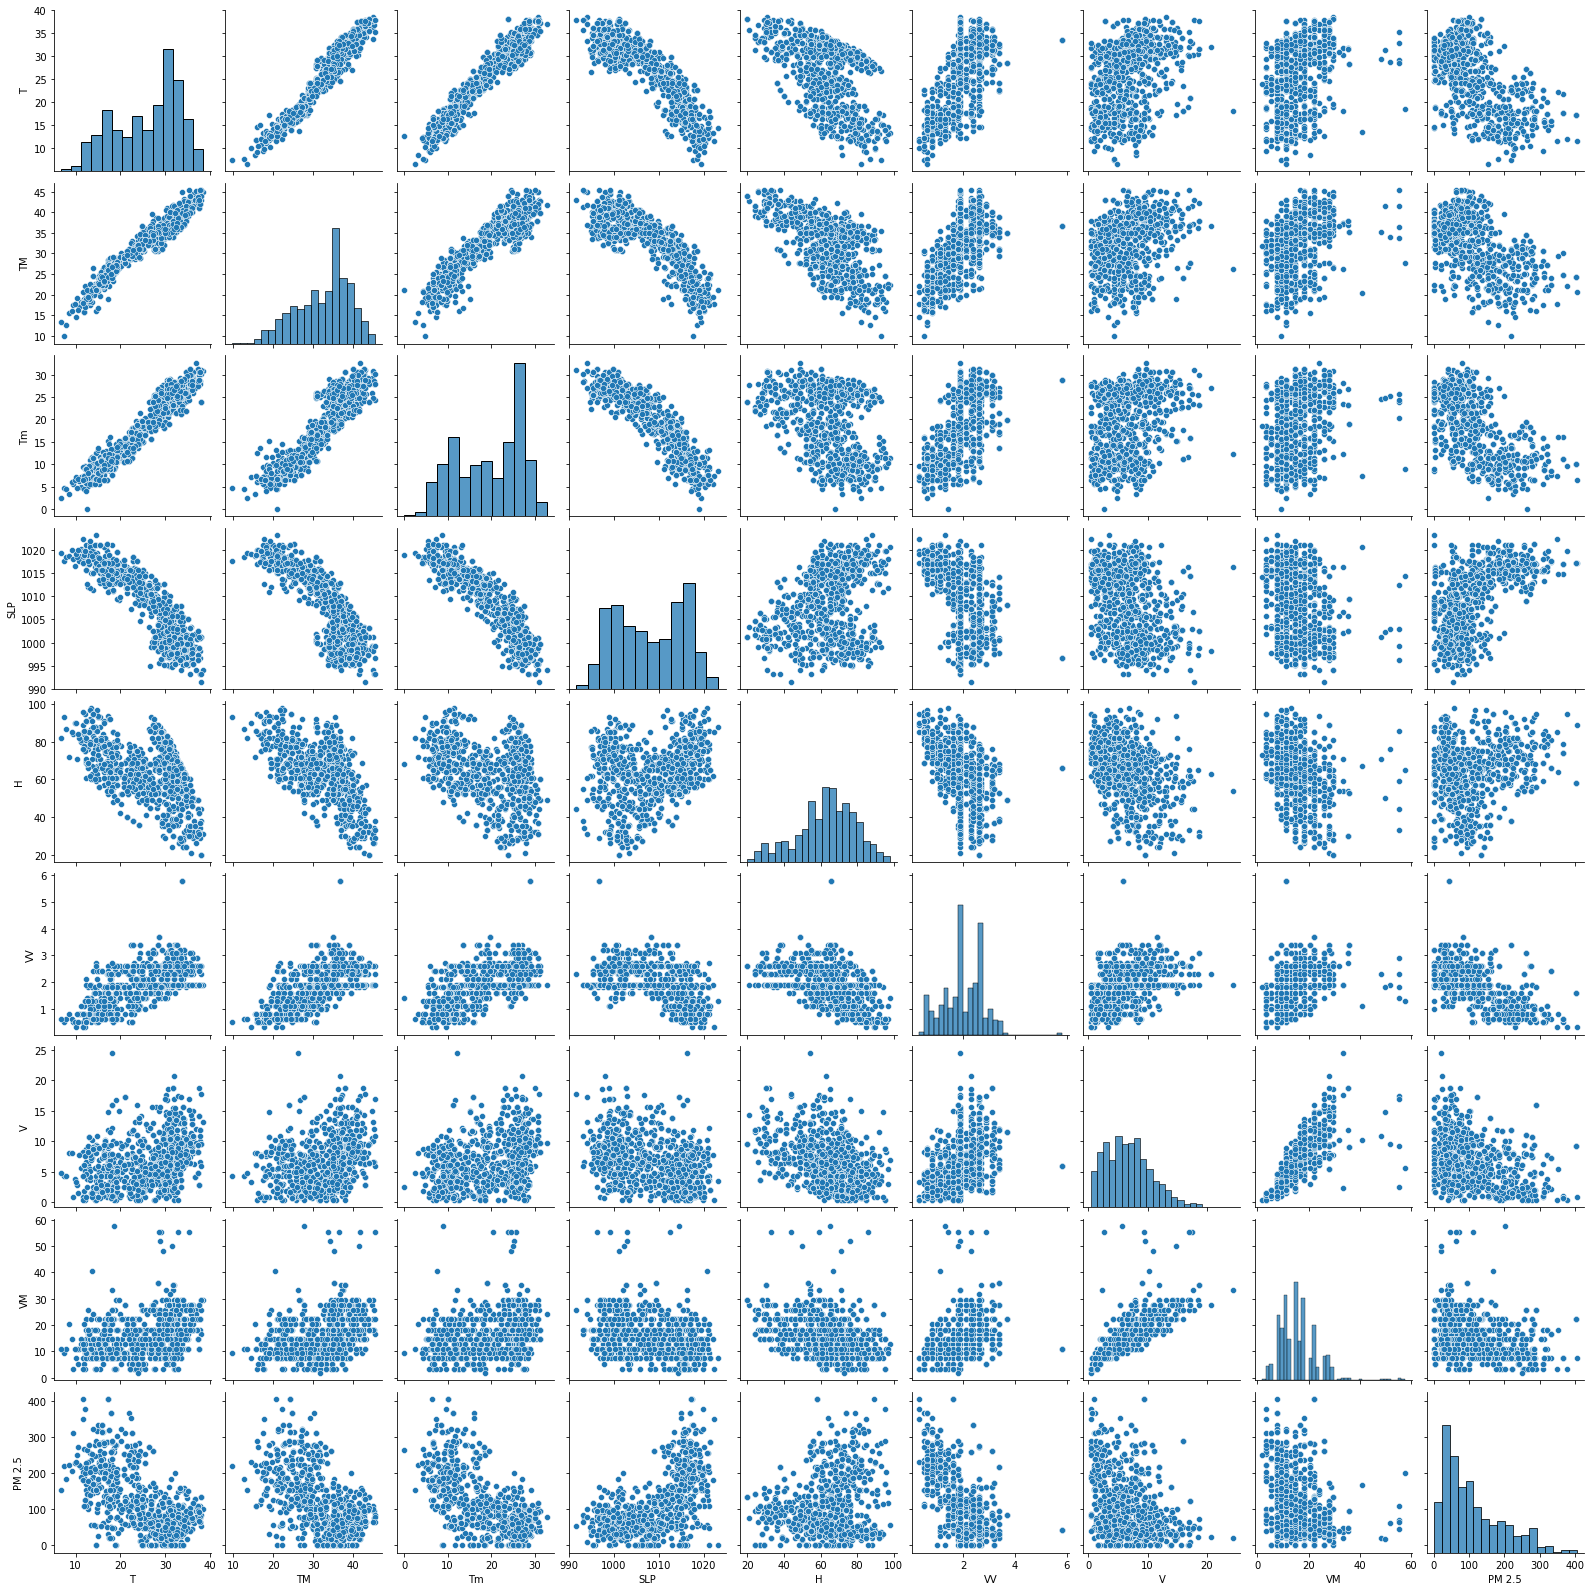

In [16]:
# pairplot
sns.pairplot(df)

In [17]:
# see the correlation in the tabular form

df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

**Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.


- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)


- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

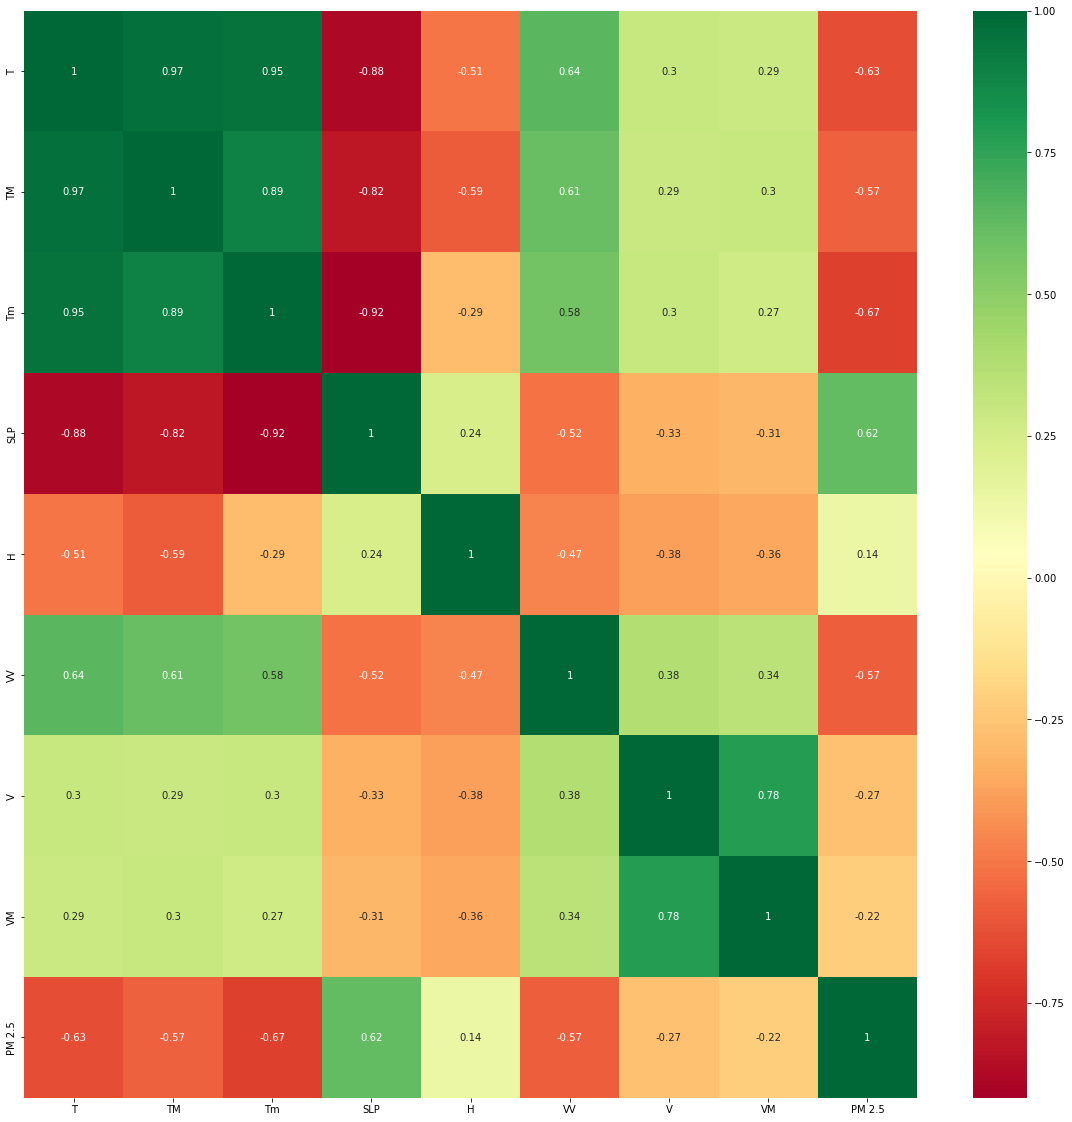

In [18]:
import seaborn as sns

# get correlation for each features in ddataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

# plt the heat map

g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [19]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

**Feature Importance**

 - You can get the feature importance of each feature of your dataset by using the feature importance property of the model.


 - Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.


 - Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [21]:
x.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [22]:
print(model.feature_importances_)

[0.18235025 0.09570546 0.20108019 0.15673276 0.08758191 0.18150076
 0.05386552 0.04118315]


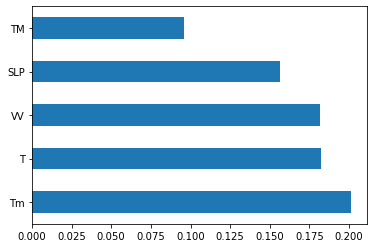

In [23]:
# plot th egraph of feature importances for beter visualisation#

feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()




## Linear Regression 

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

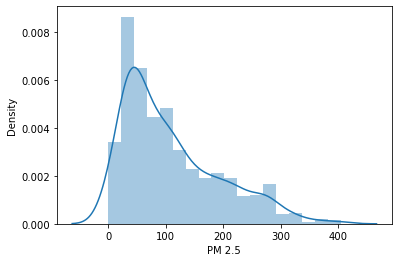

In [24]:
sns.distplot(y)

## Train Test split

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [31]:
regressor.intercept_

448.11616967589515

In [32]:
print("coeffcient of determination R^2 <--  on train set : {}".format(regressor.score(x_train,y_train)))

coeffcient of determination R^2 <--  on train set : 0.551516808175875


In [34]:
print("coeffcient of determination R^2 <--  on train set : {}".format(regressor.score(x_test,y_test)))

coeffcient of determination R^2 <--  on train set : 0.48525331308567876


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv = 5)

In [36]:
score.mean()

0.4710569304807393

### Model Evaluation

In [37]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns = ['coefficient'])

coeff_df

coefficient
T      -2.690908
TM      0.462200
Tm     -3.867052
SLP    -0.044949
H      -1.211936
VV    -40.114908
V      -2.535633
VM      0.561482

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5 .

In [38]:
y_pred = regressor.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

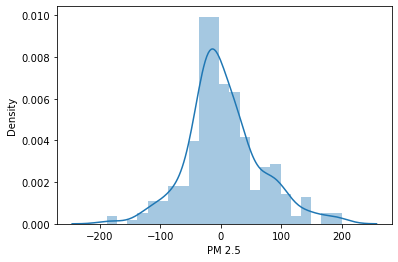

In [39]:
sns.distplot(y_test - y_pred)

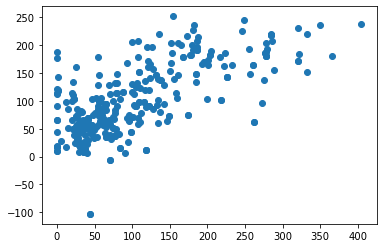

In [40]:
plt.scatter(y_test,y_pred)

### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

 
**Mean Squared Error** (MSE) is the mean of the squared errors:

 
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

 
Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are **loss functions**, because we want to minimize them.

In [41]:
from sklearn import metrics

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384


### Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [45]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [46]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3664.364899607175


### Model Evaluation

In [54]:
y_pred = ridge_regressor.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

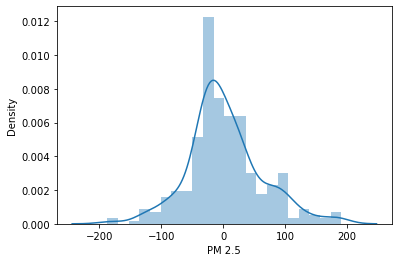

In [55]:
sns.distplot(y_test - y_pred)

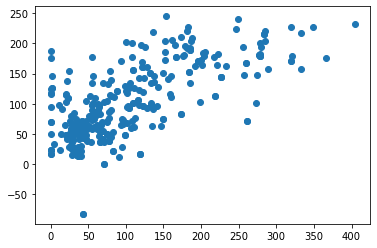

In [56]:
plt.scatter(y_test,y_pred)

In [57]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 44.63734335996219
MSE: 3627.094448927199
RMSE: 60.22536383391303


## Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1443875.0678712588, tolerance: 614.559203374646
  model = cd_fast.enet_coordinate_descent(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.9493827724, tolerance: 678.9710639134807
  model = cd_fast.enet_coordinate_descent(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2270733204, tolerance: 626.8737580831347
  model = cd_fast.enet_coordinate_descent(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

{'alpha': 1}
-3666.78325343702


## **Model Evaluation**

In [50]:
y_pred = lasso_regressor.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

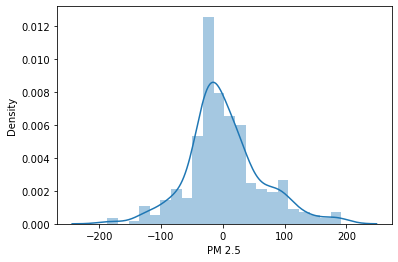

In [51]:
sns.distplot(y_test - y_pred)

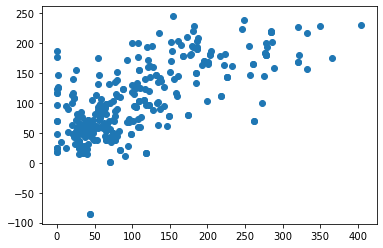

In [52]:
plt.scatter(y_test,y_pred)

In [53]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 44.50831198875126
MSE: 3627.8109390424697
RMSE: 60.2313119485411


### Decision Tree Regressor

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

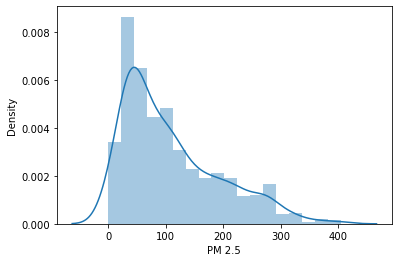

In [58]:
sns.distplot(y)

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dtree = DecisionTreeRegressor(criterion = "mse")

In [61]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
print("coeffcient of determination R^2 <--- on train set : {}".format(dtree.score(x_train,y_train)))

coeffcient of determination R^2 <--- on train set : 1.0


In [63]:
print("coeffcient of determination R^2 <--- on train set : {}".format(dtree.score(x_test,y_test)))

coeffcient of determination R^2 <--- on train set : 0.6971484768089767


In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,x,y,cv = 5)

In [65]:
score.mean()

0.4544552647051147

## **Model Evaluation**

In [66]:
y_test = dtree.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

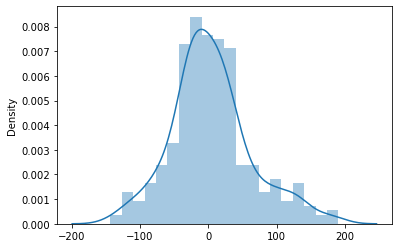

In [67]:
sns.distplot(y_test - y_pred)

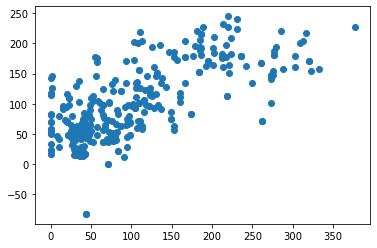

In [68]:
plt.scatter(y_test,y_pred)

## **Hyperparameter Tuning Decsion Tree Regressor**

In [70]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [71]:
# Hyper parameter Optimization

params = {"splitter" : ["best","random"],
         "max_depth" : [3,4,5,6,8,10,12,15],
         "min_samples_leaf":[1,2,3,4,5],
         "min_weight_fraction_leaf" :[0.1,0.2,0.3,0.4],
         "max_features" : ["auto","log2","sqrt",None],
         "max_leaf_nodes":[None,10,20,30,40,50,60,70]}

In [72]:
## Hyperparameter aptimization using GridsearchCV
from sklearn.model_selection import GridSearchCV

In [73]:
random_search = GridSearchCV(dtree,params,scoring = 'neg_mean_squared_error',n_jobs = -1,cv = 10, verbose = 3)

In [74]:
random_search.fit(x,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [75]:
random_search.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [76]:
random_search.best_score_

-3131.6489619178874

In [77]:
y_pred = random_search.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

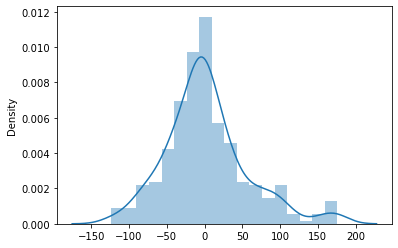

In [78]:
sns.distplot(y_test - y_pred)

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 39.62103298153871
MSE: 3015.3943449644926
RMSE: 54.912606430258734


## Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
print("coeffcient of determination R^2 <---- on train set : {}".format(regressor.score(x_train,y_train)))

coeffcient of determination R^2 <---- on train set : 0.9734612175095673


In [83]:
print("coeffcient of determination R^2 <---- on train set : {}".format(regressor.score(x_test,y_test)))

coeffcient of determination R^2 <---- on train set : 0.8006823713098645


In [84]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv = 5)

In [85]:
score.mean()

0.727270440374573

## Model Evaluation

In [91]:
y_pred = regressor.predict(x_test)

In [92]:
y_pred

array([100.06375   , 126.70266667, 275.14258333, 101.365     ,
        42.31083333, 140.65733333, 225.28954167, 170.465     ,
        44.26333333, 193.22241667,  86.72791667, 155.55958333,
        33.54666667,  80.47916667,  97.48166667, 155.55958333,
       240.63383333, 222.55608333,  75.82041667, 149.60370833,
        13.495     ,  38.6875    ,  42.13      , 106.42041667,
       146.69754167,  78.085     ,  39.67958333, 130.99333333,
        15.18833333,  75.98041667,  89.8925    , 129.85975   ,
       132.778625  ,  20.1425    ,  45.42833333, 103.54166667,
       271.24008333,  91.83      ,  49.61333333, 118.61320833,
        57.39083333,  52.65458333, 169.836375  , 131.29125   ,
       124.76666667,  97.48166667,  54.76083333,  86.72791667,
       125.90416667,  92.55583333, 238.70316667,  81.83916667,
       324.74391667,  85.37625   ,  47.1475    ,  47.1475    ,
        63.75941667, 102.38125   ,  42.86625   ,  40.61916667,
        53.44208333, 117.67458333,  35.31958333, 228.97

In [93]:
y_test

array([104.625     , 125.89166667, 279.6       , 110.41666667,
        43.04166667, 136.75      , 212.125     , 135.16666667,
        67.45833333, 110.875     ,  87.83333333, 173.58333333,
        33.16666667,  94.375     , 115.83333333, 173.58333333,
       188.5       , 302.45833333,  79.83333333, 152.32083333,
         0.        ,  26.66666667, 113.33333333, 108.        ,
       130.70833333,  75.58333333,  38.25      , 149.58333333,
         0.        ,  76.54166667,  18.875     , 109.33333333,
        31.625     ,  15.16666667,  43.66666667,  98.41666667,
       284.79583333,  52.625     ,  23.20833333,  57.08333333,
        57.58333333, 153.375     , 184.20833333, 133.375     ,
       110.70833333, 115.83333333,  28.375     ,  87.83333333,
       149.58333333,  98.41666667, 276.90833333,  17.5       ,
       376.91666667,  98.41666667,  43.66666667,  43.66666667,
        54.79166667, 122.5       ,  19.83333333,  77.        ,
        43.95833333, 138.5       ,  36.        , 113.87

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

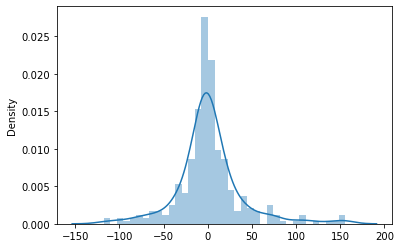

In [95]:
sns.distplot(y_test - y_pred)

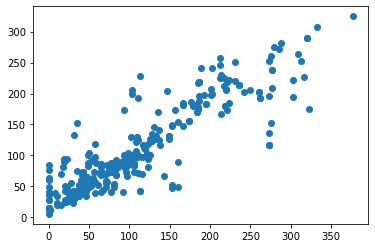

In [96]:
plt.scatter(y_test,y_pred)

## Hyper parameter tuning

In [97]:
RandomForestRegressor()

RandomForestRegressor()

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [100]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [102]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [103]:
# use the random grid to search for best hyperparameters
# first create the base model to tune

rf = RandomForestRegressor()

In [106]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [107]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [109]:
rf_random.best_score_

-1551.2772105361187

In [112]:
y_pred = rf_random.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

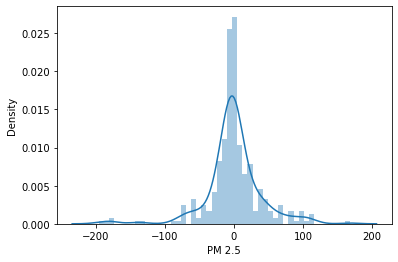

In [114]:
sns.distplot(y_test - y_pred)

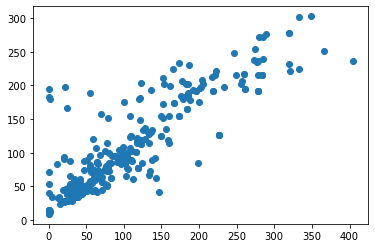

In [115]:
plt.scatter(y_test,y_pred)

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 24.737821908124914
MSE: 1657.9983754255725
RMSE: 40.71852619417324


## KNN - Regressor

In [117]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
regressor = KNeighborsRegressor(n_neighbors = 1)
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [120]:
print("coeffcient of determination R^2 <-- on training set : {}".format(regressor.score(x_train,y_train)))

coeffcient of determination R^2 <-- on training set : 1.0


In [121]:
print("coeffcient of determination R^2 <-- on test set : {}".format(regressor.score(x_test,y_test)))

coeffcient of determination R^2 <-- on test set : 0.5417545333477789


In [123]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv = 5)

In [124]:
score.mean()

0.39387489016756577

## Model Evaluation

In [125]:
y_pred = regressor.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

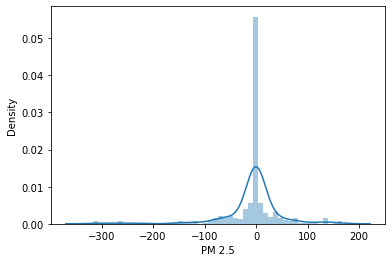

In [126]:
sns.distplot(y_test - y_pred)

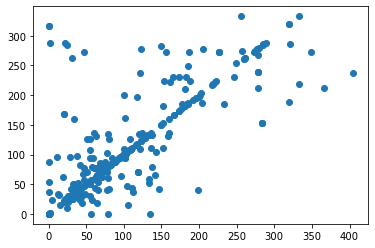

In [127]:
plt.scatter(y_test,y_pred)

## Hyperparameter Tuning

In [129]:
accuracy_rate = []

for i in range(1,60):
    knn = KNeighborsRegressor(n_neighbors = i)
    score = cross_val_score(knn,x,y,cv=10,scoring ="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

In [130]:
accuracy_rate

[-3313.1422505508062,
 -2899.0314433509407,
 -3284.5243665217095,
 -3317.279988207386,
 -3335.442210407435,
 -3400.904747138454,
 -3469.9207164183877,
 -3417.0133615067652,
 -3416.7957560673376,
 -3454.1987626354485,
 -3458.561967648785,
 -3506.0418919791628,
 -3526.2341867771916,
 -3543.266012789109,
 -3543.9452857545575,
 -3536.191746081263,
 -3520.8407733401377,
 -3498.542714344937,
 -3503.7950317914933,
 -3495.9653877503465,
 -3497.998427901154,
 -3490.5630773743665,
 -3482.5177500963487,
 -3495.805531611562,
 -3509.4153978437207,
 -3488.5900860084703,
 -3500.045820751018,
 -3498.5524311206586,
 -3503.7679530398104,
 -3519.3080111715744,
 -3522.5488401980388,
 -3541.866642010783,
 -3547.557970469113,
 -3553.8470442853154,
 -3563.6683475537384,
 -3556.2286919807752,
 -3555.1569008322417,
 -3561.2943599939667,
 -3568.9597845299454,
 -3572.39583829282,
 -3580.084517651904,
 -3589.653208391762,
 -3594.7706484156397,
 -3588.4622239158066,
 -3589.3256474785985,
 -3597.1080899147637,
 -36

Text(0, 0.5, 'Accuracy Rate')

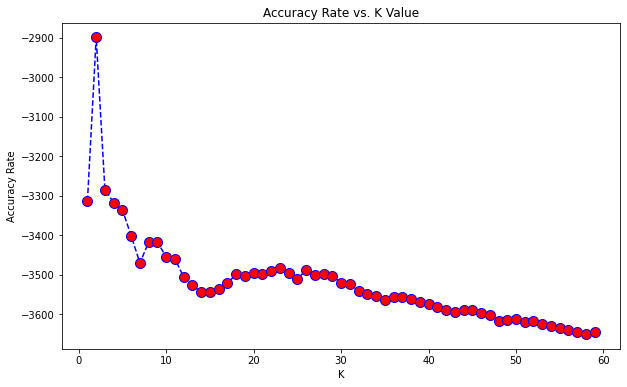

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy_rate,color='blue', linestyle='dashed',marker = 'o',markerfacecolor = 'red',markersize =  10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [147]:
# FIRST A QUICK COMPARISSION

knn = KNeighborsRegressor(n_neighbors = 1)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

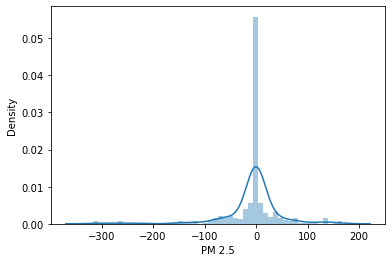

In [148]:
sns.distplot(y_test - y_pred)

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 26.46491361788618
MSE: 3282.779510713076
RMSE: 57.295545295538254


In [150]:
# FIRST A QUICK COMPARISSION

knn = KNeighborsRegressor(n_neighbors = 25)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

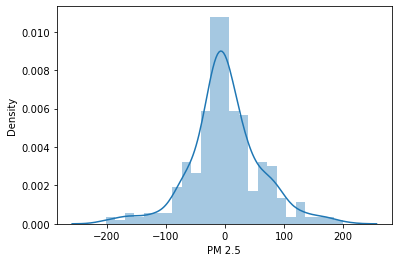

In [151]:
sns.distplot(y_test - y_pred)

In [152]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 42.70041412601626
MSE: 3586.1330143037767
RMSE: 59.8843302901834


### XGBOOST

In [154]:
# conda install -c ananconda py-xgboost


Note: you may need to restart the kernel to use updated packages.



UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: ananconda
  channel url: https://conda.anaconda.org/ananconda
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [1]:
conda config --show channels

channels:
  - defaults

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

In [4]:
import xgboost as xgb

In [26]:
regressor = xgb.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9997717196345083


In [30]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8123312908288712


In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv = 5)

In [32]:
score.mean()

0.7251276747945072

## Model Evaluation

In [33]:
y_pred = regressor.predict(x_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

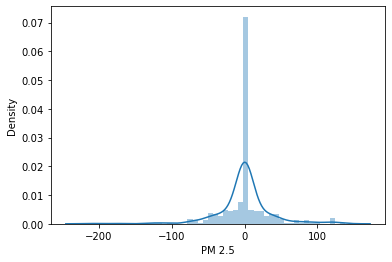

In [35]:
sns.distplot(y_test- y_pred)

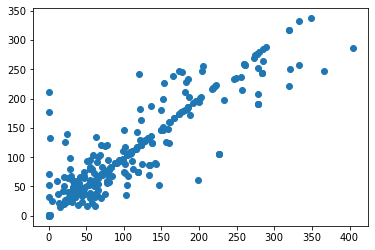

In [36]:
plt.scatter(y_test,y_pred)

### Hyperparmater Tuning

In [38]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [42]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [44]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [45]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   3.7s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   3.4s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   para

In [46]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [47]:
xg_random.best_score_

-1380.5446346152435

In [ ]:
rf_random.best_score_

In [49]:
y_pred=xg_random.predict(x_test)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

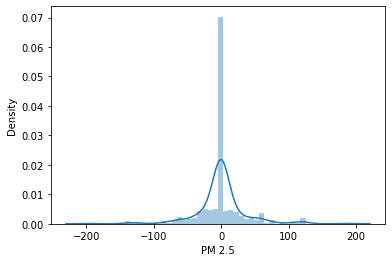

In [50]:
sns.distplot(y_test-y_pred)

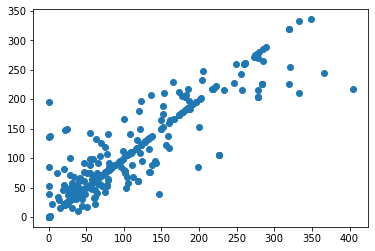

In [51]:
plt.scatter(y_test,y_pred)

In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19.02743722623126
MSE: 1355.7081047805843
RMSE: 36.81994167269395
